Tutorial https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html

In [1]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from sklearn import preprocessing

## 1. 

Write a program to extract the color histogram of each of the 2,000 images. Choose the
parameters required with justifications. Implement your own histogram code and compare its
results with open-source API like OpenCV and numpy.

In [2]:
PATH = './Homework1/'
images = sorted(os.listdir(PATH))

def getim(img):
    return cv2.imread(PATH + img)

def imshow(img):
#     plt.imshow(img, cmap='gray')
    plt.imshow(img)

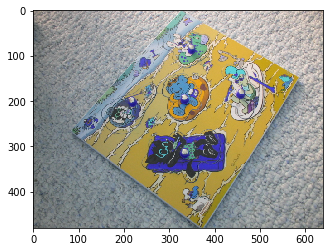

In [3]:
img = getim(images[0])
imshow(img)

#### Examples of calculation the histograms in numpy and OpenCV

In [14]:
hist_shape = (40,40)
max_hue = 180
max_saturation = 255

def get_hist(img):    
    channels = [0, 1]    # take only first 2 channels (hue, and SATURATION)
    
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)   # convert BGR to HSV
    hist = cv2.calcHist([hsv], channels, None, hist_shape, [0, max_hue, 0, max_saturation])
    
    hist = preprocessing.normalize(hist, norm='max') # normalize histogram
    return hist

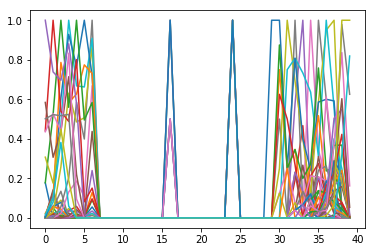

In [15]:
plt.plot(get_hist(img))
plt.show()

In [16]:
# calculate histograms for each instance

histograms = []

for i in images:
    image = getim(i)
    hist = get_hist(image)
    
    histograms.append(hist)
    
len(histograms)

2000

## 2. 

Write a program to measure the $L_2$ distance between color histograms of two images.

In [17]:
# simple L2 norm of histograms
def distance(h1, h2):
    return np.linalg.norm(h1 - h2)

distance(histograms[0], histograms[1])

1.872767

## 3. 

Use 5 images shown above (ukbench00004.jpg; ukbench00040.jpg; ukbench00060.jpg;
ukbench00588.jpg; ukbench01562.jpg) as queries. For each query image, find 10 best matches
from the 2,000 images based on the color histogram similarity.
Plot the query image and the 10 returned matches (use icons of reduced resolution to save
space).

## 4.

Write a program to measure and plot the P-R curve for each query.

Tutorial for PR curve https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [8]:
from sklearn.metrics import precision_recall_curve
from inspect import signature

def pr_curve(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    
    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
# pr_curve([1,1,1,1,0,0,0,0,0,0], [1,0,0,1,0,0,1,0,0,0])

In [9]:
def img2plot(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

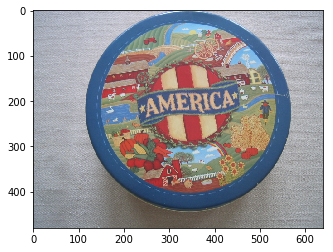

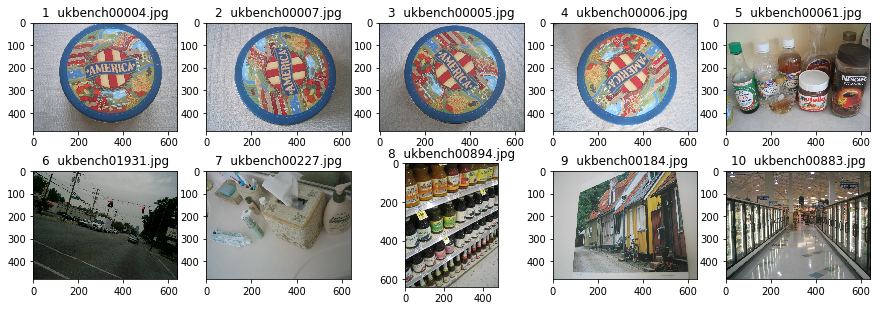

correct predictions: [1 1 1 1 0 0 0 0 0 0]
ground truth       : [1 1 1 1 0 0 0 0 0 0]


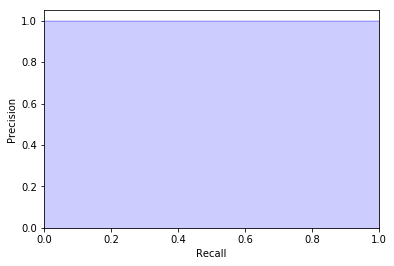

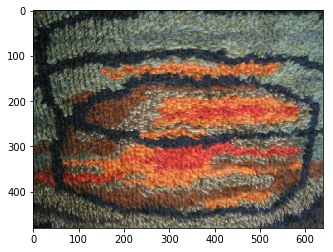

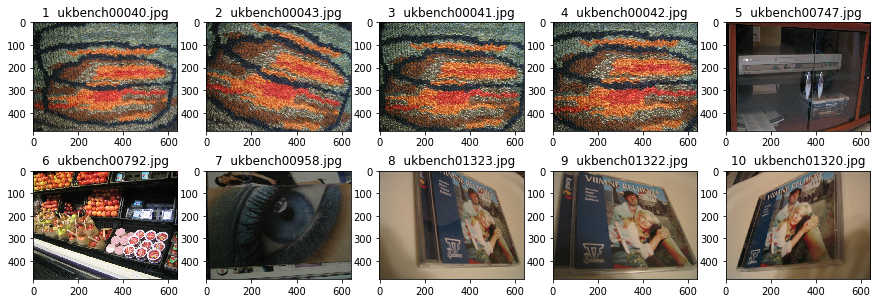

correct predictions: [1 1 1 1 0 0 0 0 0 0]
ground truth       : [1 1 1 1 0 0 0 0 0 0]


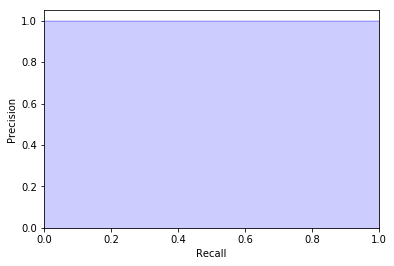

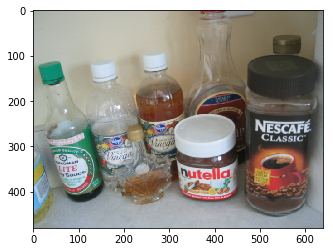

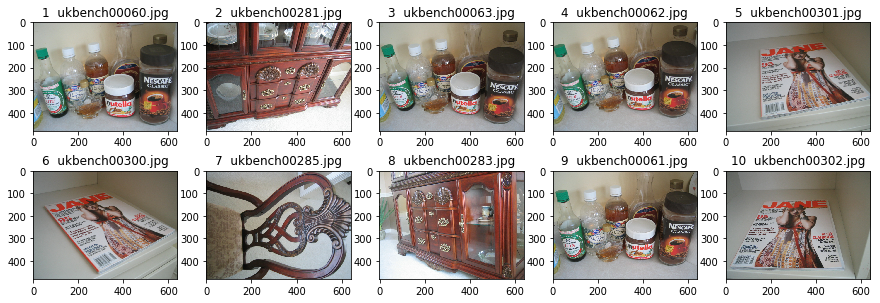

correct predictions: [1 0 1 1 0 0 0 0 1 0]
ground truth       : [1 1 1 1 0 0 0 0 0 0]


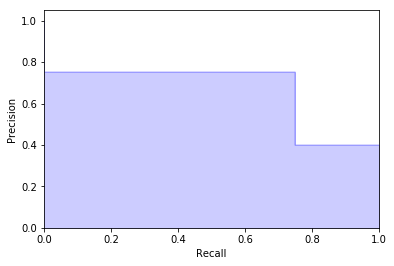

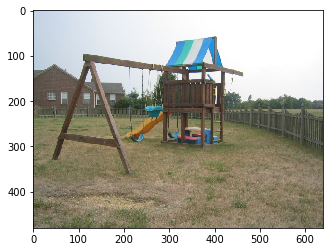

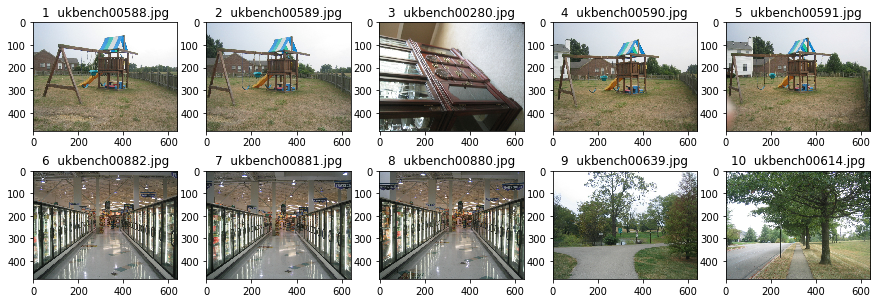

correct predictions: [1 1 0 1 1 0 0 0 0 0]
ground truth       : [1 1 1 1 0 0 0 0 0 0]


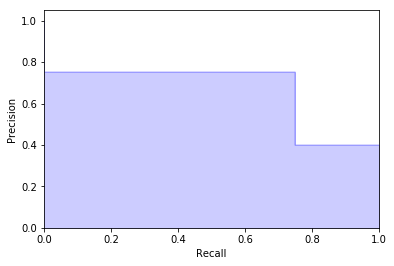

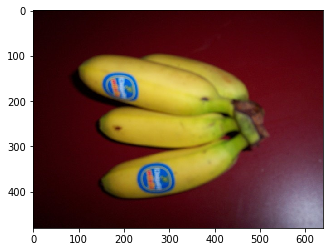

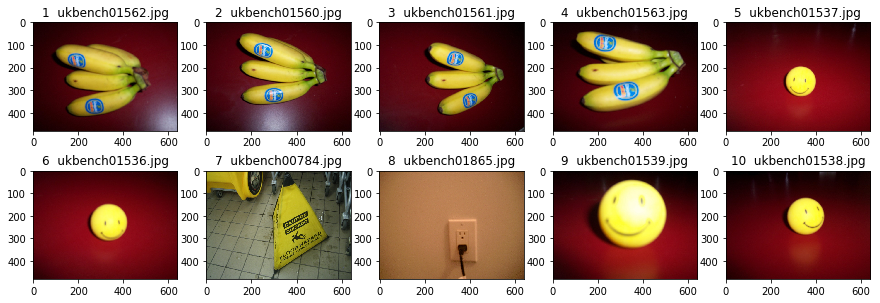

correct predictions: [1 0 0 1 0 0 0 0 0 0]
ground truth       : [1 1 1 1 0 0 0 0 0 0]


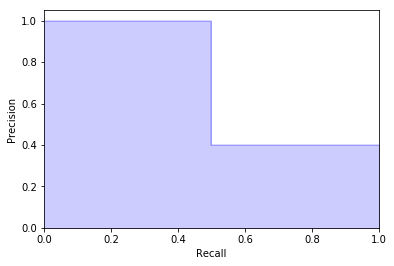

In [10]:
test_images_indexes = [4, 40, 60, 588, 1562]

top_num = 10

for test_i in test_images_indexes:
    test_hist = histograms[test_i]
    
    result = []
    
    for (j,hist) in enumerate(histograms):
#         if j == test_i: continue
        # calculate each distance
        result.append([ distance(hist, test_hist), j ])
        
        
    result = np.array(result).astype(int)
    
    # take top 10 results to show
    result_to_diplay = result[result[:,0].argsort()][:top_num]

    # display test image
    original_img = getim(images[test_i])
    
#     print(images[test_i])    
    
    plt.figure()
    imshow(img2plot(original_img))
    plt.show()
    
    rows, columns = 2, 5
    
    fig, axes = plt.subplots(rows, columns)
    # set size of plots
    fig.set_size_inches(15, 5)
    
    index = 0
    for i in range(rows):
        for j in range(columns):
            img_file_name = images[result_to_diplay[index][1]]
            img = getim(img_file_name)
            axes[i,j].set_title(str(index+1) + '  ' + img_file_name)
            axes[i,j].imshow( img2plot(img) )
            index += 1
            
    plt.show()

    
    # calculate ground_truth and predicted results
    prediction = np.zeros(top_num).astype(int)
    ground_truth = np.zeros(top_num).astype(int)
    class_size = 4
    for (i,item) in enumerate(result_to_diplay):
        # if predicted index in correct rrange
        if item[1] in range(test_i, test_i + class_size):
            prediction[i] = 1
            
        if i < class_size:
            ground_truth[i] = 1
            
    pr_curve(ground_truth, prediction)

    print('correct predictions:', prediction)
    print('ground truth       :', ground_truth) 


## 5. Discuss and explain success and failure cases.

I implemented the base method for comparing images by color histogram.

So the best result is on 40th image as we have pretty unique texture on full image. Also there is one more edge case. It's 1562. There are a lot of images with the same background. As long as, histogram matches numbers of similar colors and backgroung takes a large area, I have a bad result here. The other cases seem good enough for such simple comparison. There is at least one correct example (except 60th) in top 10 except the test image.

Also I checked 2 method of taking histograms from the images. It turns out that histongam by two HSV channels  shows better result then one or two RGB channels.

Then I tried to tune the shape of the histogram and applied normalization. It improved the result very well. There are only two sets with 1 mistake but the true result is in top 10.